In [2]:
print("Hello World")

Hello World


In [4]:
# Using the Sales Target dataset, calculate the percentage change in target sales
# for the Furniture category month-over-month.

In [6]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
sales_target_data = pd.read_csv("Sales_target_DD2E9B96A0.csv")
sales_target_data.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [10]:
furniture_data = sales_target_data[sales_target_data['Category']=='Furniture']

In [12]:
furniture_data

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0
5,Sep-18,Furniture,11000.0
6,Oct-18,Furniture,11100.0
7,Nov-18,Furniture,11300.0
8,Dec-18,Furniture,11400.0
9,Jan-19,Furniture,11500.0


In [14]:
furniture_data['Month of Order Date'] = pd.to_datetime(furniture_data['Month of Order Date'],format = '%b-%y')

C:\Users\mandi\AppData\Local\Temp\ipykernel_3444\2548550206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_data['Month of Order Date'] = pd.to_datetime(furniture_data['Month of Order Date'],format = '%b-%y')


In [16]:
furniture_data

,Month of Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-05-01,Furniture,10500.0
2,2018-06-01,Furniture,10600.0
3,2018-07-01,Furniture,10800.0
4,2018-08-01,Furniture,10900.0
5,2018-09-01,Furniture,11000.0
6,2018-10-01,Furniture,11100.0
7,2018-11-01,Furniture,11300.0
8,2018-12-01,Furniture,11400.0
9,2019-01-01,Furniture,11500.0


In [18]:
furniture_data['MoM (%) Change'] = round(((furniture_data['Target']-furniture_data['Target'].shift(1))/furniture_data['Target'].shift(1))*100 ,2 )

C:\Users\mandi\AppData\Local\Temp\ipykernel_3444\2888918349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_data['MoM (%) Change'] = round(((furniture_data['Target']-furniture_data['Target'].shift(1))/furniture_data['Target'].shift(1))*100 ,2 )


In [20]:
final_furniture_data_with_Mom = furniture_data

In [22]:
final_furniture_data_with_Mom

,Month of Order Date,Category,Target,MoM (%) Change
0,2018-04-01,Furniture,10400.0,NaN
1,2018-05-01,Furniture,10500.0,0.96
2,2018-06-01,Furniture,10600.0,0.95
3,2018-07-01,Furniture,10800.0,1.89
4,2018-08-01,Furniture,10900.0,0.93
5,2018-09-01,Furniture,11000.0,0.92
6,2018-10-01,Furniture,11100.0,0.91
7,2018-11-01,Furniture,11300.0,1.80
8,2018-12-01,Furniture,11400.0,0.88
9,2019-01-01,Furniture,11500.0,0.88


In [24]:
# Analyse the trends to identify months with significant target fluctuations.
# Suggest strategies for aligning target expectations with actual performance
# trends.

In [26]:
final_furniture_data_with_Mom.dtypes

Month of Order Date    datetime64[ns]
Category                       object
Target                        float64
MoM (%) Change                float64
dtype: object

In [28]:
final_furniture_data_with_Mom

,Month of Order Date,Category,Target,MoM (%) Change
0,2018-04-01,Furniture,10400.0,NaN
1,2018-05-01,Furniture,10500.0,0.96
2,2018-06-01,Furniture,10600.0,0.95
3,2018-07-01,Furniture,10800.0,1.89
4,2018-08-01,Furniture,10900.0,0.93
5,2018-09-01,Furniture,11000.0,0.92
6,2018-10-01,Furniture,11100.0,0.91
7,2018-11-01,Furniture,11300.0,1.80
8,2018-12-01,Furniture,11400.0,0.88
9,2019-01-01,Furniture,11500.0,0.88


In [30]:
data = final_furniture_data_with_Mom

In [32]:
mean_change = data["MoM (%) Change"].mean()
round(mean_change,3)

1.155

In [34]:
standard_deviation_change = data["MoM (%) Change"].std()
round(standard_deviation_change,3)

0.419

In [36]:
threshold = mean_change+(1.5*standard_deviation_change)
round(threshold,3)

1.784

In [40]:
threshold_percentile = data["MoM (%) Change"].quantile(0.75)
round(threshold_percentile,3)

1.34

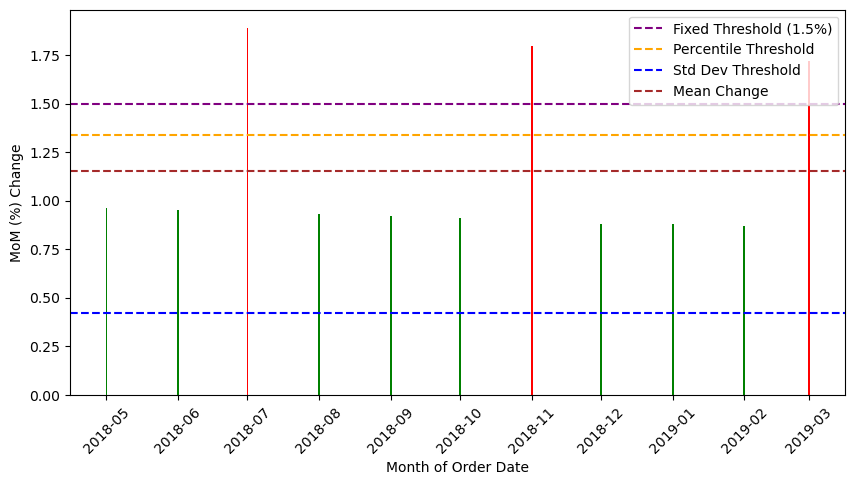

In [102]:
fixed_threshold = 1.5
colors = ['red' if i>fixed_threshold else 'green' for i in data['MoM (%) Change'].fillna(0)]
plt.figure(figsize=(10,5))
plt.bar(data['Month of Order Date'],data['MoM (%) Change'],color=colors)
plt.xlabel("Month of Order Date")
plt.ylabel("MoM (%) Change")
plt.xticks(rotation=45)
plt.axhline(y=fixed_threshold,color="purple",linestyle="--",label=f"Fixed Threshold ({fixed_threshold}%)")
plt.axhline(y = threshold_percentile,color="orange",linestyle="--",label="Percentile Threshold")
plt.axhline(y = standard_deviation_change,color="blue",linestyle="--",label="Std Dev Threshold")
plt.axhline(y = mean_change,color="brown",linestyle="--",label="Mean Change")
plt.legend()
plt.show()

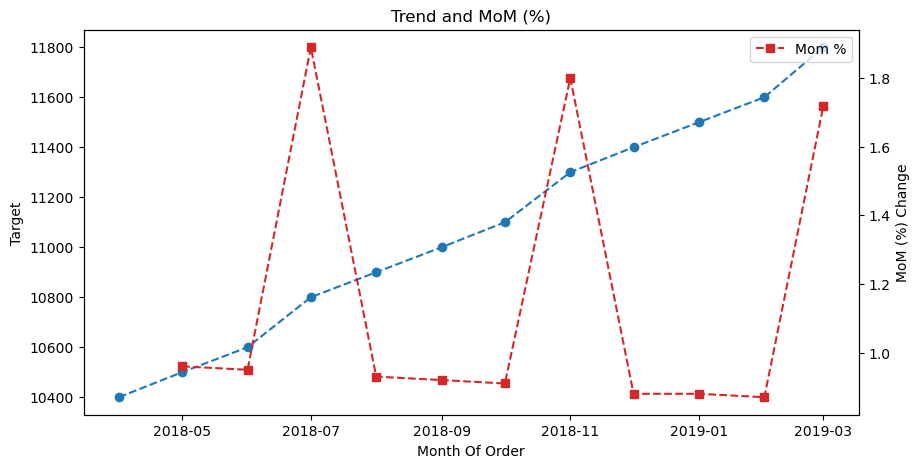

In [116]:
figure,axis1 = plt.subplots(figsize = (10,5))
plt.title("Trend and MoM (%)")
axis1.plot(final_furniture_data_with_Mom["Month of Order Date"] , final_furniture_data_with_Mom["Target"] , marker="o", linestyle="--",color="tab:blue")
plt.xlabel("Month Of Order")
plt.ylabel("Target")
axis2 = axis1.twinx()
axis2.plot(final_furniture_data_with_Mom["Month of Order Date"],final_furniture_data_with_Mom["MoM (%) Change"],marker = "s",linestyle="--",color = "tab:red",label="Mom %")
plt.ylabel("MoM (%) Change")
plt.legend()
plt.show()